### Adding white noise channels or all-zeros channels to MNIST:

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

2024-01-07 19:07:18.581599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255


In [3]:
train_images_with_noise_channels = np.concatenate(
[train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate( [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
print(train_images_with_noise_channels[0])

[0.         0.         0.         ... 0.56221449 0.89616031 0.3347488 ]


In [6]:
print(train_images_with_zeros_channels[0])

[0. 0. 0. ... 0. 0. 0.]


### Training the same model on MNIST data with noise channels or all-zero channels:

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
def get_model():
    model = keras.Sequential([
        layers.Dense(256,activation="relu"),
        layers.Dense(128,activation="relu"),
        layers.Dense(10,activation="softmax")
        
    ])
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

In [9]:
model_noise = get_model()
history_noise = model_noise.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.6161 - accuracy: 0.8015 - val_loss: 0.2599 - val_accuracy: 0.9237
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2397 - accuracy: 0.9249 - val_loss: 0.2284 - val_accuracy: 0.9302
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1594 - accuracy: 0.9504 - val_loss: 0.2377 - val_accuracy: 0.9278
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1178 - accuracy: 0.9624 - val_loss: 0.1215 - val_accuracy: 0.9638
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0900 - accuracy: 0.9694 - val_loss: 0.1771 - val_accuracy: 0.9496
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0693 - accuracy: 0.9777 - val_loss: 0.1668 - val_accuracy: 0.9518
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.1223 - val_accuracy: 0.9686

In [10]:
model_zeros = get_model()
history_zeros = model_zeros.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2984 - accuracy: 0.9115 - val_loss: 0.1454 - val_accuracy: 0.9572
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1187 - accuracy: 0.9643 - val_loss: 0.1021 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0784 - accuracy: 0.9762 - val_loss: 0.0976 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.1000 - val_accuracy: 0.9725
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0882 - val_accuracy: 0.9761
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0907 - val_accuracy: 0.9757
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.1000 - val_accuracy: 0.9754

### Plotting a validation accuracy comparison:

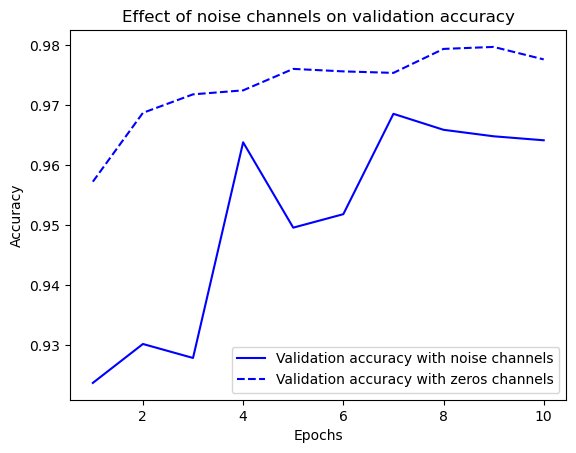

In [11]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"] 
val_acc_zeros = history_zeros.history["val_accuracy"] 
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


## The nature of generalization in deep learning:

### Fitting an MNIST model with randomly shuffled labels:

In [12]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [13]:
model = keras.Sequential([
            layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffled = model.fit(train_images, random_train_labels,
          epochs=30,
          batch_size=128,
          validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 12ms/step - loss: 2.3157 - accuracy: 0.1029 - val_loss: 2.3035 - val_accuracy: 0.1032
Epoch 2/30
375/375 [==============================] - 4s 11ms/step - loss: 2.2998 - accuracy: 0.1140 - val_loss: 2.3099 - val_accuracy: 0.1057
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 2.2918 - accuracy: 0.1276 - val_loss: 2.3117 - val_accuracy: 0.1007
Epoch 4/30
375/375 [==============================] - 4s 12ms/step - loss: 2.2804 - accuracy: 0.1373 - val_loss: 2.3287 - val_accuracy: 0.1056
Epoch 5/30
375/375 [==============================] - 5s 13ms/step - loss: 2.2653 - accuracy: 0.1473 - val_loss: 2.3309 - val_accuracy: 0.1060
Epoch 6/30
375/375 [==============================] - 5s 13ms/step - loss: 2.2448 - accuracy: 0.1627 - val_loss: 2.3456 - val_accuracy: 0.1047
Epoch 7/30
375/375 [==============================] - 5s 13ms/step - loss: 2.2214 - accuracy: 0.1809 - val_loss: 2.3566 - val_accuracy: 0.1035

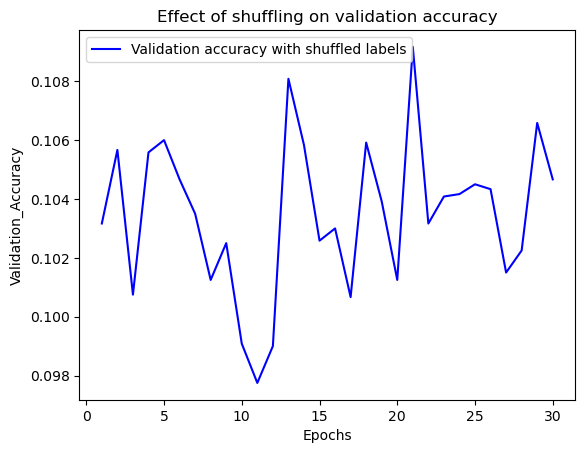

In [14]:
val_acc_shuffled = history_shuffled.history["val_accuracy"] 

epochs = range(1, 31)
plt.plot(epochs, val_acc_shuffled, "b-",label="Validation accuracy with shuffled labels")

plt.title("Effect of shuffling on validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Validation_Accuracy")
plt.legend()


## Improving model fit:

### Tuning key gradient descent parameters

#### Training a MNIST model with an incorrectly high learning rate:

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_high_learning_rate = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 916.9573 - accuracy: 0.3459 - val_loss: 2.2827 - val_accuracy: 0.2447
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 2.5516 - accuracy: 0.2079 - val_loss: 2.0037 - val_accuracy: 0.2547
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 2.7990 - accuracy: 0.2066 - val_loss: 2.2221 - val_accuracy: 0.1982
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4798 - accuracy: 0.2054 - val_loss: 2.1377 - val_accuracy: 0.2116
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 2.6689 - accuracy: 0.2226 - val_loss: 2.1327 - val_accuracy: 0.2327
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2995 - accuracy: 0.2104 - val_loss: 2.3278 - val_accuracy: 0.2101
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3972 - accuracy: 0.1957 - val_loss: 2.2701 - val_accuracy: 0.11

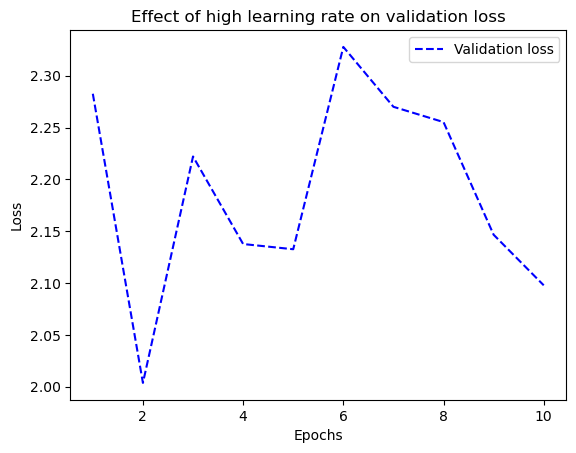

In [20]:

val_loss = history_high_learning_rate.history["val_loss"] 
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",label="Validation loss")
plt.title("Effect of high learning rate on validation loss") 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

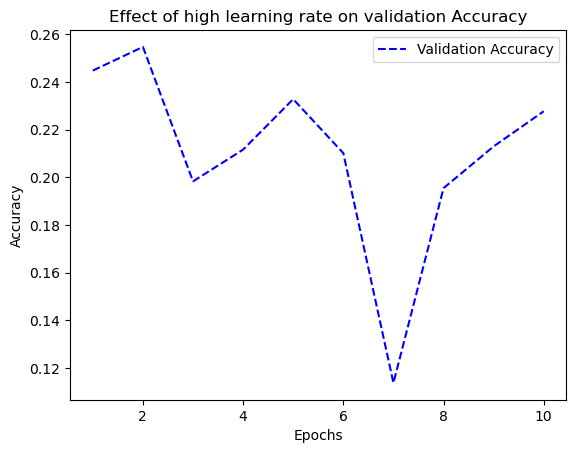

In [22]:
val_accuarcy = history_high_learning_rate.history["val_accuracy"] 
epochs = range(1, 11)
plt.plot(epochs, val_accuarcy, "b--",label="Validation Accuracy")
plt.title("Effect of high learning rate on validation Accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The same model with a more appropriate learning rate

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_appropriate_learning_rate = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3463 - accuracy: 0.9120 - val_loss: 0.1598 - val_accuracy: 0.9545
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1277 - accuracy: 0.9647 - val_loss: 0.1398 - val_accuracy: 0.9608
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0969 - accuracy: 0.9744 - val_loss: 0.1642 - val_accuracy: 0.9658
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0808 - accuracy: 0.9794 - val_loss: 0.1434 - val_accuracy: 0.9738
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0686 - accuracy: 0.9825 - val_loss: 0.1780 - val_accuracy: 0.9680
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0607 - accuracy: 0.9851 - val_loss: 0.1993 - val_accuracy: 0.9701
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0580 - accuracy: 0.9862 - val_loss: 0.1856 - val_accuracy: 0.9697

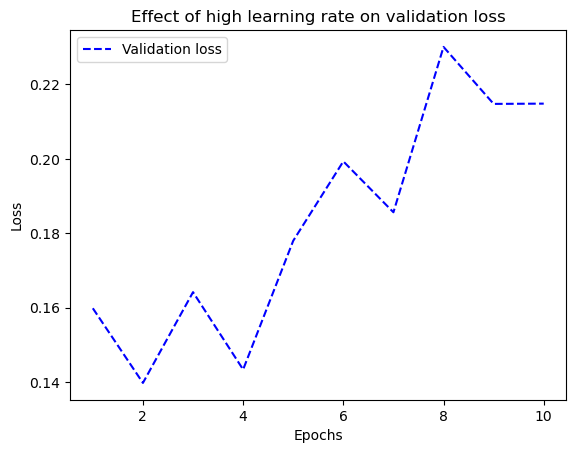

In [24]:
val_loss = history_appropriate_learning_rate.history["val_loss"] 
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",label="Validation loss")
plt.title("Effect of high learning rate on validation loss") 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

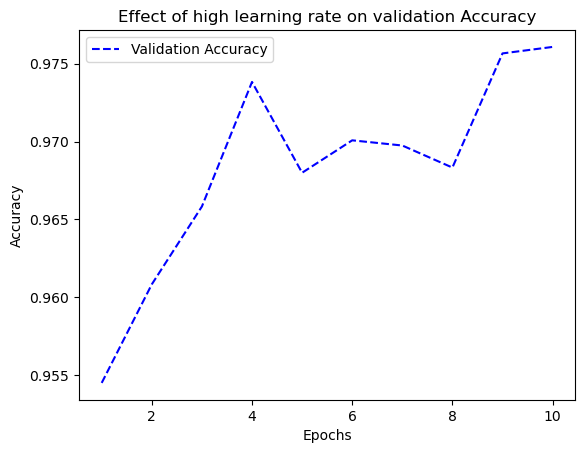

In [26]:
val_accuarcy = history_appropriate_learning_rate.history["val_accuracy"] 
epochs = range(1, 11)
plt.plot(epochs, val_accuarcy, "b--",label="Validation Accuracy")
plt.title("Effect of high learning rate on validation Accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Leveraging better architecture priors

### Increasing model capacity

#### A simple logistic regression on MNIST

In [27]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6728 - accuracy: 0.8339 - val_loss: 0.3613 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.9021 - val_loss: 0.3102 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3178 - accuracy: 0.9117 - val_loss: 0.2951 - val_accuracy: 0.9170
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9164 - val_loss: 0.2829 - val_accuracy: 0.9209
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.9187 - val_loss: 0.2786 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9209 - val_loss: 0.2735 - val_accuracy: 0.9256
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9215 - val_loss: 0.2717 - val_accuracy: 0.9245
Epoch 

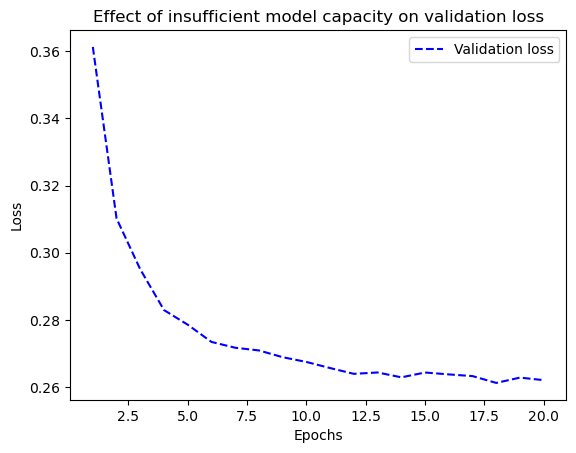

In [28]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [29]:
# Let’s try training a bigger model, one with two intermediate layers with 96 units each
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.3720 - accuracy: 0.8941 - val_loss: 0.1880 - val_accuracy: 0.9445
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1619 - accuracy: 0.9519 - val_loss: 0.1395 - val_accuracy: 0.9588
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9668 - val_loss: 0.1125 - val_accuracy: 0.9675
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9737 - val_loss: 0.1060 - val_accuracy: 0.9682
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0934 - val_accuracy: 0.9731
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.1058 - val_accuracy: 0.9698
Epoch 

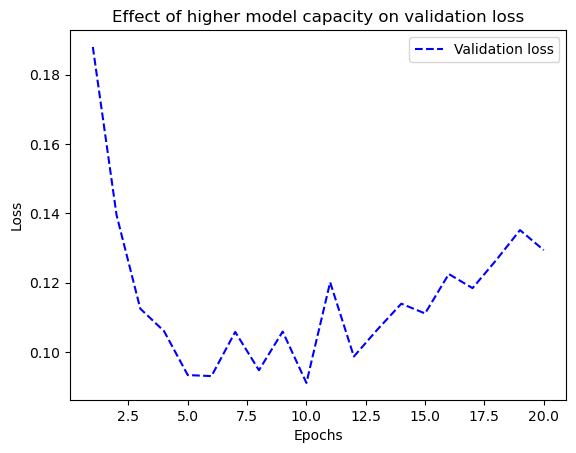

In [32]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of higher model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The validation curve now looks exactly like it should: the model fits fast and starts overfitting after 10 epochs.
Also it reaches a lower validation error less than 0.1 not like the model with lower capacity which stabilizes at 0.26

## Improving generalization

In [42]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5544 - accuracy: 0.7567 - val_loss: 0.4290 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3470 - accuracy: 0.8911 - val_loss: 0.3449 - val_accuracy: 0.8649
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2540 - accuracy: 0.9177 - val_loss: 0.2869 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2047 - accuracy: 0.9331 - val_loss: 0.2815 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1651 - accuracy: 0.9481 - val_loss: 0.2800 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1442 - accuracy: 0.9538 - val_loss: 0.2840 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1217 - accuracy: 0.9625 - val_loss: 0.2972 - val_accuracy: 0.8864
Epoch 8/20
30

### Version of the model with lower capacity

In [43]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6638 - accuracy: 0.5626 - val_loss: 0.6325 - val_accuracy: 0.7616
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5701 - accuracy: 0.7637 - val_loss: 0.5409 - val_accuracy: 0.8547
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4958 - accuracy: 0.8443 - val_loss: 0.5130 - val_accuracy: 0.7926
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4598 - accuracy: 0.8775 - val_loss: 0.4869 - val_accuracy: 0.8440
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4322 - accuracy: 0.8999 - val_loss: 0.4739 - val_accuracy: 0.8588
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4097 - accuracy: 0.9161 - val_loss: 0.4646 - val_accuracy: 0.8675
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3907 - accuracy: 0.9278 - val_loss: 0.4557 - val_accuracy: 0.8778
Epoch 8/20
30

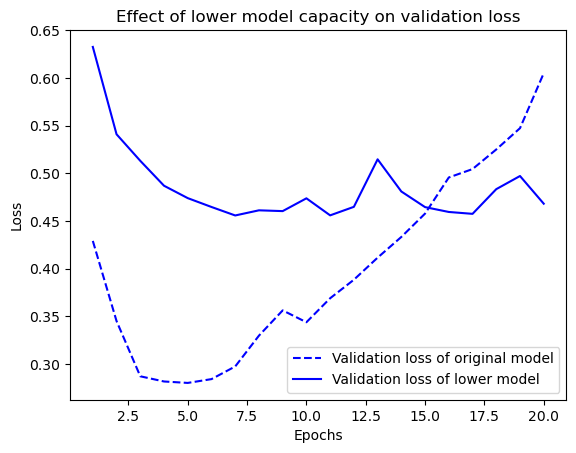

In [44]:
val_loss_original = history_original.history["val_loss"]
val_loss_lower = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_lower, "b",
         label="Validation loss of lower model")
plt.title("Effect of lower model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can see that the validation loss of the lower model is less than the original one.And also the lower model doesn't show overfitting in the 20 epochs like the original model who starts to overfit after epoch 5.

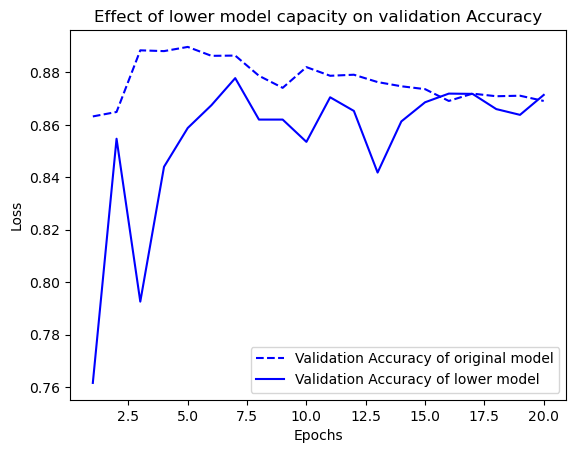

In [45]:
val_accuracy_original = history_original.history["val_accuracy"]
val_accuracy_lower = history_smaller_model.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_accuracy_original, "b--",
         label="Validation Accuracy of original model")
plt.plot(epochs, val_accuracy_lower, "b",
         label="Validation Accuracy of lower model")
plt.title("Effect of lower model capacity on validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Version of the model with higher capacity

In [46]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 420ms/step - loss: 0.5676 - accuracy: 0.7171 - val_loss: 0.3414 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 11s 384ms/step - loss: 0.3300 - accuracy: 0.8589 - val_loss: 0.3964 - val_accuracy: 0.8269
Epoch 3/20
30/30 [==============================] - 11s 380ms/step - loss: 0.2489 - accuracy: 0.8995 - val_loss: 0.2713 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 11s 385ms/step - loss: 0.1799 - accuracy: 0.9307 - val_loss: 0.3165 - val_accuracy: 0.8721
Epoch 5/20
30/30 [==============================] - 11s 385ms/step - loss: 0.1422 - accuracy: 0.9464 - val_loss: 0.3015 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 11s 383ms/step - loss: 0.1044 - accuracy: 0.9630 - val_loss: 0.3344 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 12s 400ms/step - loss: 0.0950 - accuracy: 0.9715 - val_loss: 0.3540 - val_accuracy: 0.8847

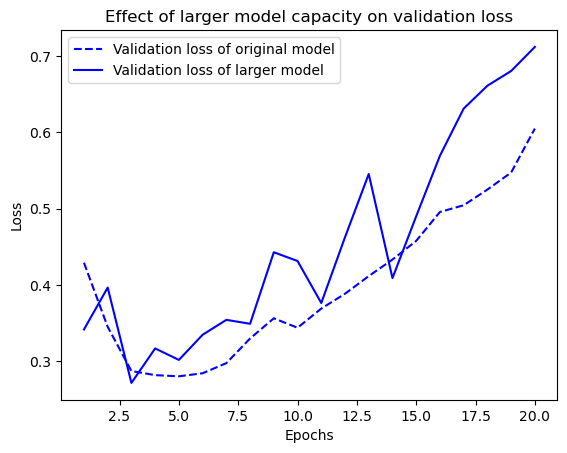

In [47]:
val_loss_original = history_original.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can see that the validation loss of the larger model starts overfit actually after the third epoch.

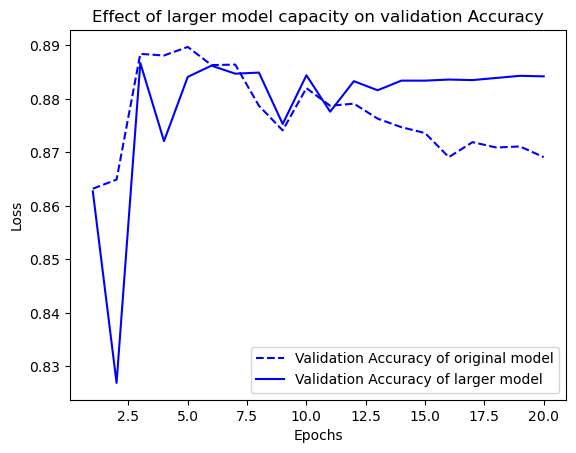

In [48]:
val_accuracy_original = history_original.history["val_accuracy"]
val_accuracy_larger = history_larger_model.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_accuracy_original, "b--",
         label="Validation Accuracy of original model")
plt.plot(epochs, val_accuracy_larger, "b",
         label="Validation Accuracy of larger model")
plt.title("Effect of larger model capacity on validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Adding weight regularization


#### Adding L2 weight regularization to the model

In [49]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6097 - accuracy: 0.7802 - val_loss: 0.4906 - val_accuracy: 0.8480
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4124 - accuracy: 0.8899 - val_loss: 0.3970 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3344 - accuracy: 0.9118 - val_loss: 0.3877 - val_accuracy: 0.8717
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2974 - accuracy: 0.9261 - val_loss: 0.3785 - val_accuracy: 0.8744
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2741 - accuracy: 0.9339 - val_loss: 0.3521 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2578 - accuracy: 0.9392 - val_loss: 0.3814 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2489 - accuracy: 0.9433 - val_loss: 0.3577 - val_accuracy: 0.8848
Epoch 8/20
30

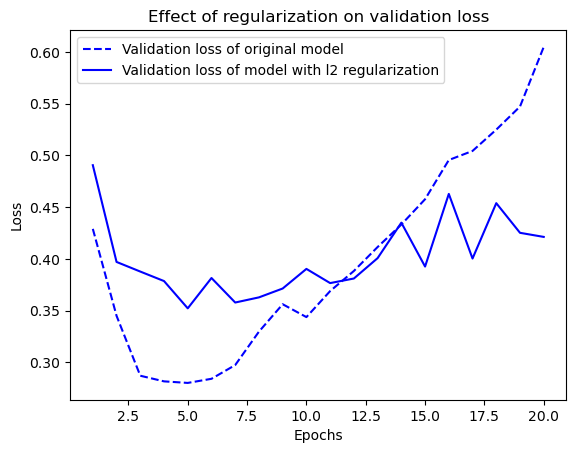

In [51]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2, "b",
         label="Validation loss of model with l2 regularization")
plt.title("Effect of regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model with L2 regularization has become much more resistant to overfitting than the reference model, even though both models have the same number of parameters.


In [56]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l1_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 1.1559 - accuracy: 0.7238 - val_loss: 0.7458 - val_accuracy: 0.7348
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6612 - accuracy: 0.8398 - val_loss: 0.6351 - val_accuracy: 0.8426
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6081 - accuracy: 0.8521 - val_loss: 0.6158 - val_accuracy: 0.8413
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5799 - accuracy: 0.8611 - val_loss: 0.6361 - val_accuracy: 0.8212
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5573 - accuracy: 0.8677 - val_loss: 0.6245 - val_accuracy: 0.8258
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5520 - accuracy: 0.8684 - val_loss: 0.5818 - val_accuracy: 0.8494
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5422 - accuracy: 0.8717 - val_loss: 0.5549 - val_accuracy: 0.8677
Epoch 8/20
30

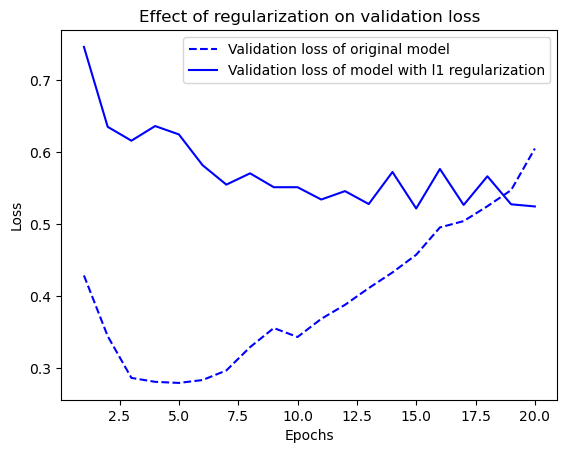

In [57]:
val_loss_original = history_original.history["val_loss"]
val_loss_l1 = history_l1_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l1, "b",
         label="Validation loss of model with l1 regularization")
plt.title("Effect of regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Adding dropout

In [58]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 77ms/step - loss: 0.6544 - accuracy: 0.6124 - val_loss: 0.5763 - val_accuracy: 0.8307
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5616 - accuracy: 0.7363 - val_loss: 0.4653 - val_accuracy: 0.8681
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4843 - accuracy: 0.7980 - val_loss: 0.4020 - val_accuracy: 0.8639
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4171 - accuracy: 0.8410 - val_loss: 0.3313 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3678 - accuracy: 0.8663 - val_loss: 0.2976 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3258 - accuracy: 0.8866 - val_loss: 0.2812 - val_accuracy: 0.8915
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2891 - accuracy: 0.9036 - val_loss: 0.2731 - val_accuracy: 0.8925
Epoch 8/20
30

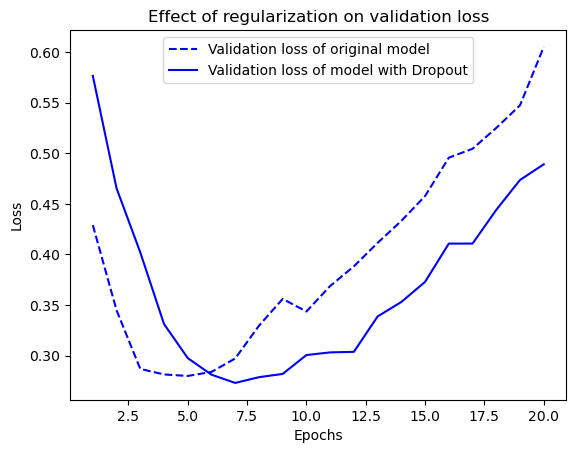

In [60]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b",
         label="Validation loss of model with Dropout")
plt.title("Effect of regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We cans see that the model with dropout reaches a lower validation error and also starts overfitting far later than the original model.